In [1]:
!pip install scikit-learn

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


In [37]:
#loading the datasets
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

#To check if both datasets have the same columns
print(list(train_df.columns) == list(test_df.columns))

#combine both datasets for more accurate exploratory data analysis 
fraud_df = pd.concat([train_df, test_df], ignore_index=True)

#display basic info
print(fraud_df.info())

#to check the number of rows and column
fraud_df.shape




True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud     

(1852394, 23)

In [38]:
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Pre-Processing :

In [39]:
# #droping unnecessary columns
fraud_df = fraud_df.drop(fraud_df.columns[0], axis=1)
fraud_df = fraud_df.drop(columns=['job', 'dob','city_pop','zip','lat','long','merch_lat','merch_long','unix_time'])
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,trans_num,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,a41d7549acf90789359a9aa5346dcb46,0


In [40]:
#checking for any duplicates present in the dataset
print(fraud_df.duplicated().sum())


0


In [41]:
#setting the index of the dataframe to transaction numbers as it's a unique identifier
fraud_df.set_index('trans_num', inplace=True)
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,is_fraud
trans_num,,,,,,,,,,,,
0b242abb623afc578575680df30655b9,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,0
1f76529f8574734946361c461b024d99,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,0
a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,0
6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,0
a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,0


In [42]:
#checking for duplicates in the index
fraud_df.index.duplicated().sum()


0

In [43]:
#to check and handle missing values
print(fraud_df.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
is_fraud                 0
dtype: int64


In [44]:
#converting columns into valid data types
#converting categorical features to categorical
fraud_df['category'] = fraud_df['category'].astype('category')
fraud_df['gender'] = fraud_df['gender'].astype('category')
fraud_df['street'] = fraud_df['street'].astype('category')
fraud_df['state'] = fraud_df['state'].astype('category')
fraud_df['city'] = fraud_df['city'].astype('category')

#converting trans_date_trans_time from object (string)to datetime format
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

print(fraud_df.dtypes)

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                         category
city                           category
state                          category
is_fraud                          int64
dtype: object


In [45]:
#extracting date and time features to use for exploratory analysis
fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['trans_date_trans_time'].dt.dayofweek
fraud_df['month'] = fraud_df['trans_date_trans_time'].dt.month
fraud_df['year'] = fraud_df['trans_date_trans_time'].dt.year
#creating a new column for full name
fraud_df['customer_name'] = fraud_df['first'] + " " + fraud_df['last']

#dropping separate first & last name columns
fraud_df.drop(columns=['first', 'last'], inplace=True)


fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,is_fraud,hour,day_of_week,month,year,customer_name
trans_num,,,,,,,,,,,,,,,
0b242abb623afc578575680df30655b9,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,0,0,1,1,2019,Jennifer Banks
1f76529f8574734946361c461b024d99,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,0,0,1,1,2019,Stephanie Gill
a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,0,0,1,1,2019,Edward Sanchez
6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,0,0,1,1,2019,Jeremy White
a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,0,0,1,1,2019,Tyler Garcia


# Exploratory Data Analysis

In [46]:
fraud_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
is_fraud,1852394.0,5.210015e-03,7.199217e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hour,1852394.0,1.280612e+01,6.815753e+00,0.000000e+00,7.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01
day_of_week,1852394.0,2.967456e+00,2.197983e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
month,1852394.0,7.152067e+00,3.424954e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
year,1852394.0,2.019501e+03,4.999996e-01,2.019000e+03,2.019000e+03,2.020000e+03,2.020000e+03,2.020000e+03


In [47]:
#checking class distribution (fraud vs non-fraud)
print(fraud_df['is_fraud'].value_counts(normalize=True)*100) 


0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


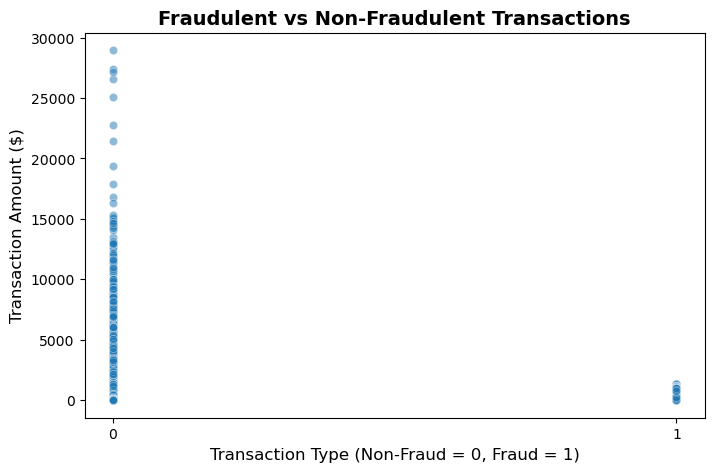

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))



# Scatter plot of fraudulent vs non-fraudulent transactions
sns.scatterplot(x=fraud_df['is_fraud'], y=fraud_df['amt'], alpha=0.5)

# Rename x-axis and y-axis
plt.xlabel("Transaction Type (Non-Fraud = 0, Fraud = 1)", fontsize=12)
plt.ylabel("Transaction Amount ($)", fontsize=12)
plt.title("Fraudulent vs Non-Fraudulent Transactions", fontsize=14, fontweight="bold")

# Fix x-axis to only show discrete values 0 and 1
plt.xticks([0, 1])  # Ensure only 0 and 1 appear as labels


plt.show()


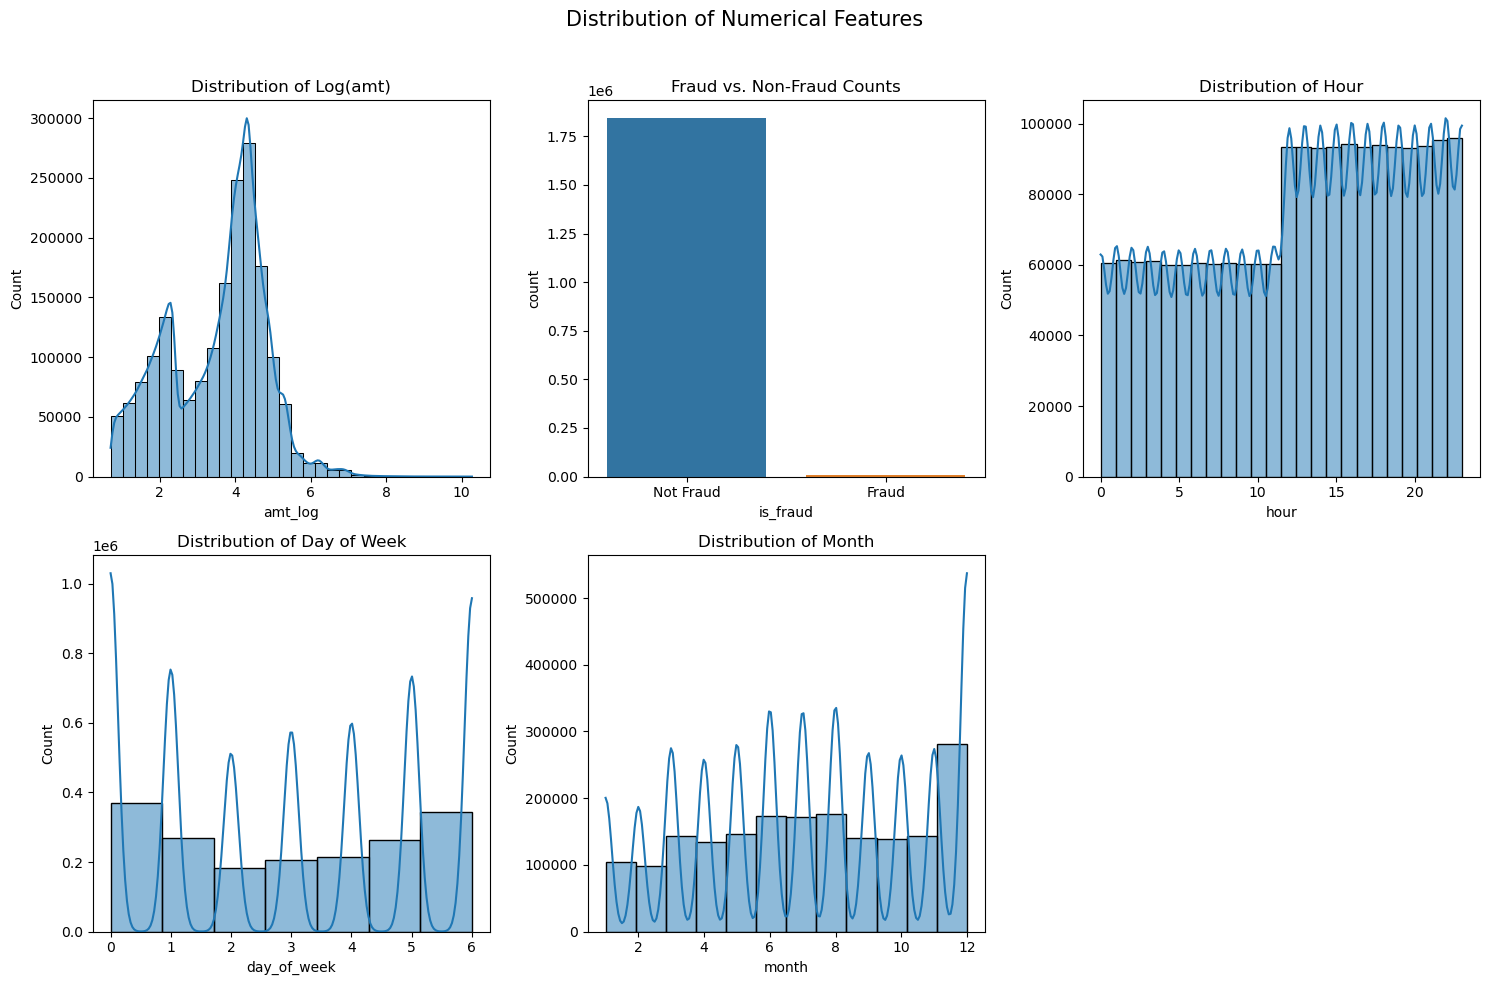

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop identifier column `cc_num`
numerical_cols = fraud_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('cc_num', errors='ignore')  # Ensure no error if 'cc_num' is absent

# Apply Log Transformation for 'amt' only
fraud_df['amt_log'] = np.log(fraud_df['amt'] + 1)

# Define subplots layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Log-transformed 'amt'
sns.histplot(fraud_df['amt_log'], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Distribution of Log(amt)")

# Fraud vs. Non-Fraud Counts
sns.countplot(x=fraud_df['is_fraud'].map({0: "Not Fraud", 1: "Fraud"}), ax=axes[1])
axes[1].set_title("Fraud vs. Non-Fraud Counts")

# Raw Hour Distribution (No Normalization)
sns.histplot(fraud_df['hour'], bins=24, ax=axes[2], kde=True)
axes[2].set_title("Distribution of Hour")

# Raw Day of Week Distribution (No Normalization)
sns.histplot(fraud_df['day_of_week'], bins=7, ax=axes[3], kde=True)
axes[3].set_title("Distribution of Day of Week")

# Raw Month Distribution (No Normalization)
sns.histplot(fraud_df['month'], bins=12, ax=axes[4], kde=True)
axes[4].set_title("Distribution of Month")

# Hide any unused subplots
for j in range(5, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Features", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#use the code below for correlation 

/Users/nidanoorali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


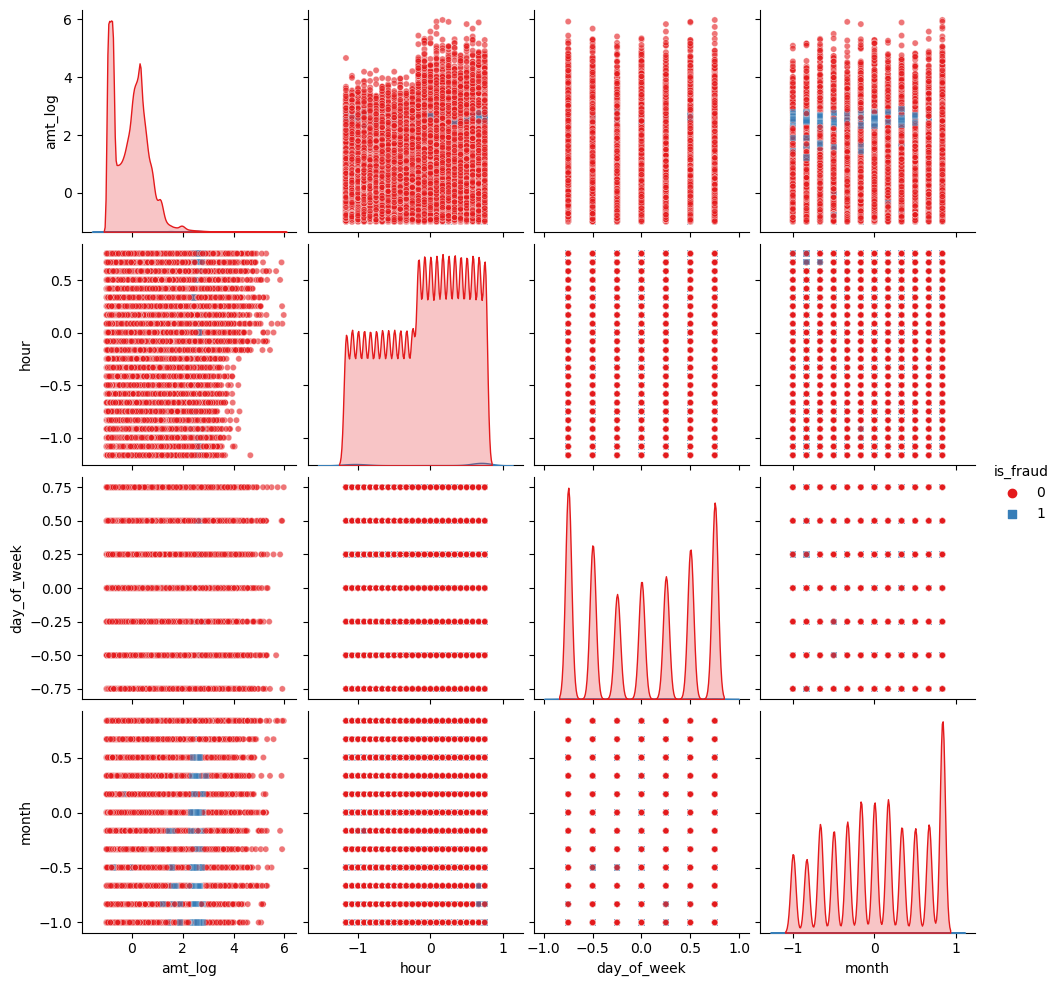

In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns (excluding target variable 'is_fraud')
numerical_cols = ['amt', 'hour', 'day_of_week', 'month']

# Standardization (Mean = 0, Std = 1)
scaler = StandardScaler()
fraud_df_standardized = fraud_df.copy()
fraud_df_standardized[numerical_cols] = scaler.fit_transform(fraud_df[numerical_cols])

# Normalization (Range 0-1)
scaler_minmax = MinMaxScaler()
fraud_df_normalized = fraud_df.copy()
fraud_df_normalized[numerical_cols] = scaler_minmax.fit_transform(fraud_df[numerical_cols])

# Log Transformation for 'amt' (handles outliers)
fraud_df['amt_log'] = np.log(fraud_df['amt'] + 1) # log(amount + 1) to avoid log(0)

import seaborn as sns
import matplotlib.pyplot as plt

# Select transformed numerical columns (use standardized, normalized, or log-transformed)
transformed_cols = ['amt_log', 'hour', 'day_of_week', 'month', 'is_fraud'] # Use 'amt_log' for better scale

# Create Pairplot with transformed numerical features
sns.pairplot(
    fraud_df[transformed_cols], # use transformed dataframe
    hue='is_fraud',
    diag_kind='kde', # Improved color palette
    palette='Set1', # Different markers for fraud & non-fraud
    markers=['o', 's'], # Enhance scatter visibility
    plot_kws={'alpha': 0.6, 's': 20}
)

plt.show()






In [54]:
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,is_fraud,hour,day_of_week,month,year,customer_name,amt_log
trans_num,,,,,,,,,,,,,,,,
0b242abb623afc578575680df30655b9,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,0,0,1,1,2019,Jennifer Banks,1.786747
1f76529f8574734946361c461b024d99,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,0,0,1,1,2019,Stephanie Gill,4.684259
a1a22d70485983eac12b5b88dad1cf95,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,0,0,1,1,2019,Edward Sanchez,5.398660
6b849c168bdad6f867558c3793159a81,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,0,0,1,1,2019,Jeremy White,3.828641
a41d7549acf90789359a9aa5346dcb46,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,0,0,1,1,2019,Tyler Garcia,3.760269


In [55]:
#to find Top 10 Fraudulent Merchants & Their Categories

# Extract top 10 merchants with most fraud transactions
top_10_merchants = fraud_df[fraud_df['is_fraud'] == 1]['merchant'].value_counts().nlargest(10)

# Find the category for each top merchant
top_10_merchant_categories = fraud_df[fraud_df['merchant'].isin(top_10_merchants.index)][['merchant', 'category']].drop_duplicates()

# Create a DataFrame with top merchants and their categories
top_10_df = pd.DataFrame({'Merchant': top_10_merchants.index, 'Fraud Cases': top_10_merchants.values})
top_10_with_categories = top_10_df.merge(top_10_merchant_categories, left_on='Merchant', right_on='merchant', how='left').drop(columns=['merchant'])

# Display results
print(top_10_with_categories)

                          Merchant  Fraud Cases        category
0                fraud_Kilback LLC           62     grocery_pos
1                fraud_Kilback LLC           62     food_dining
2               fraud_Rau and Sons           60     grocery_pos
3                fraud_Kozey-Boehm           60    shopping_net
4                  fraud_Doyle Ltd           57     grocery_pos
5                 fraud_Terry-Huel           56    shopping_net
6                  fraud_Boyer PLC           55        misc_pos
7                  fraud_Boyer PLC           55    shopping_net
8                   fraud_Kuhn LLC           55        misc_net
9                   fraud_Kuhn LLC           55    shopping_pos
10            fraud_Kiehn-Emmerich           53     grocery_pos
11               fraud_Cormier LLC           53    shopping_net
12               fraud_Cormier LLC           53  health_fitness
13  fraud_Moen, Reinger and Murphy           53     grocery_pos


<Figure size 1000x700 with 0 Axes>

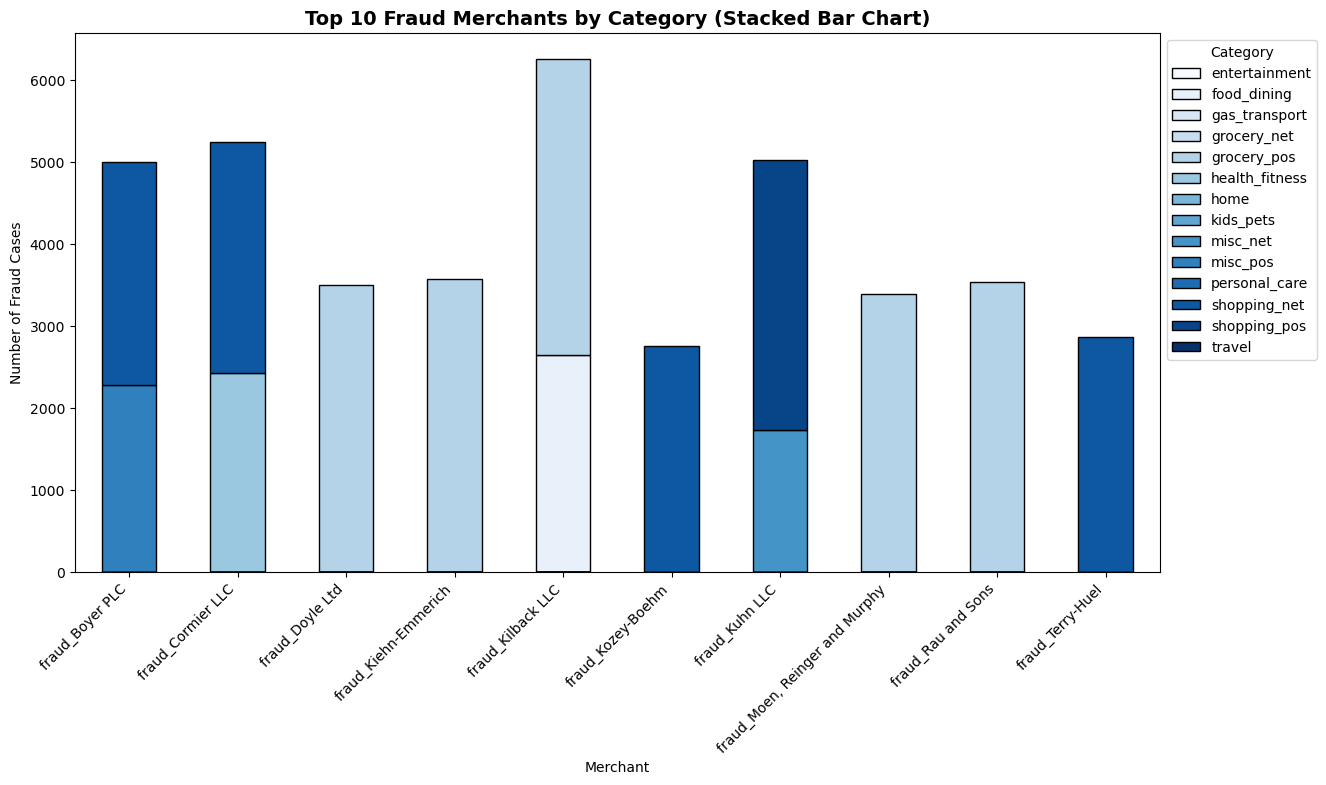

In [56]:
# Get the top 10 merchants with the most fraud cases
top_10_merchants = fraud_df[fraud_df['is_fraud'] == 1]['merchant'].value_counts().nlargest(10).index

# Get fraud cases and their categories for these merchants
top_10_merchant_data = fraud_df[fraud_df['merchant'].isin(top_10_merchants)][['merchant', 'category', 'is_fraud']]

# Aggregate fraud cases per merchant-category combination
top_10_aggregated = top_10_merchant_data.groupby(['merchant', 'category']).size().reset_index(name='Fraud Cases')

# Pivot the data for a stacked bar chart
stacked_data = top_10_aggregated.pivot(index="merchant", columns="category", values="Fraud Cases").fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(10, 7))
stacked_data.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="Blues", edgecolor="black")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Fraud Merchants by Category (Stacked Bar Chart)", fontsize=14, fontweight="bold")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraud Cases")
plt.legend(title="Category", bbox_to_anchor=(1,1))

# Show plot
plt.show()


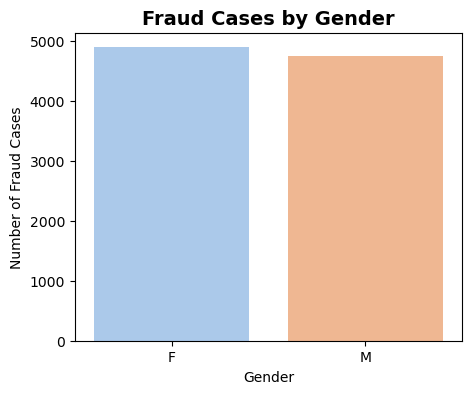

In [60]:
# Fraud count by gender
fraud_gender_counts = fraud_df[fraud_df['is_fraud'] == 1]['gender'].value_counts()

# Plot
plt.figure(figsize=(5, 4))
sns.barplot(x=fraud_gender_counts.index, y=fraud_gender_counts.values, palette="pastel")
plt.title("Fraud Cases by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of Fraud Cases")
plt.show()


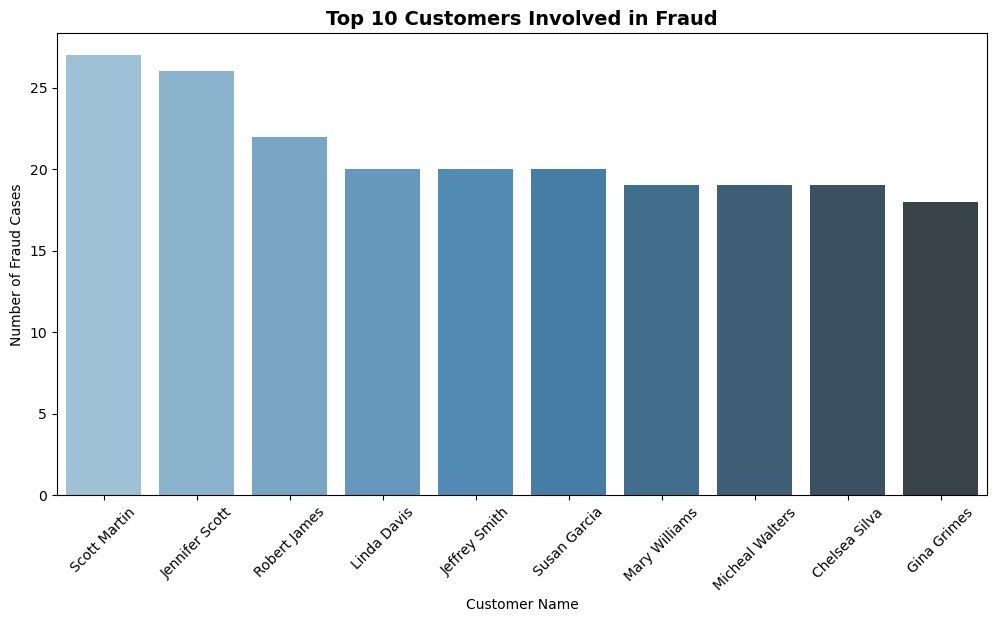

In [66]:
# Count fraud cases per customer
top_fraud_customers = fraud_df[fraud_df['is_fraud'] == 1]['customer_name'].value_counts().nlargest(10)

# Plot with blue color scheme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_fraud_customers.index, y=top_fraud_customers.values, palette="Blues_d")  # Changed to Blues palette
plt.xticks(rotation=45)
plt.title("Top 10 Customers Involved in Fraud", fontsize=14, fontweight='bold')
plt.xlabel("Customer Name")
plt.ylabel("Number of Fraud Cases")
plt.show()


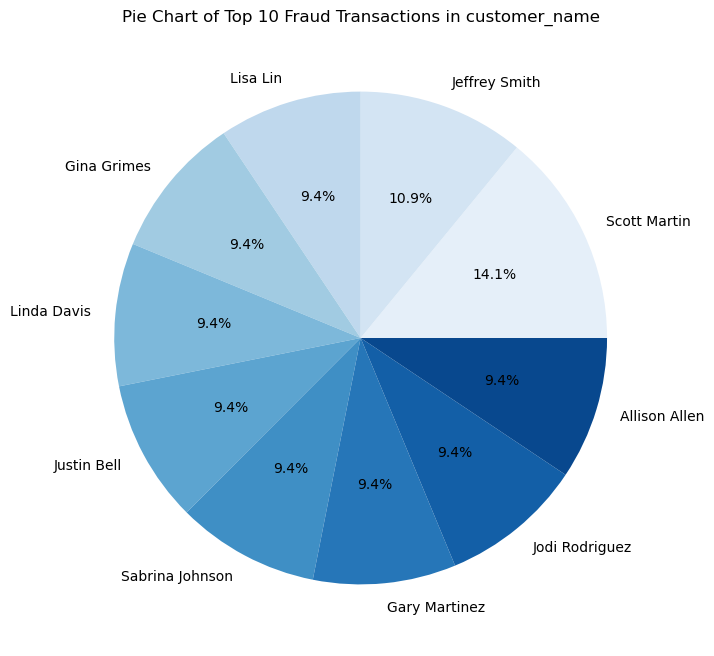

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns (Replace with actual categorical column names)
categorical_cols = ['customer_name']  # Replace with relevant categorical columns

for col in categorical_cols:
    plt.figure(figsize=(8, 8))

    # Get top 10 fraud categories
    top_10 = fraud_df[col].value_counts().nlargest(10)

    # Plot Pie Chart with blue theme
    plt.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', 
            colors=sns.color_palette("Blues", 10))  # Changed to blue palette
    
    plt.title(f"Pie Chart of Top 10 Fraud Transactions in {col}")
    plt.show()


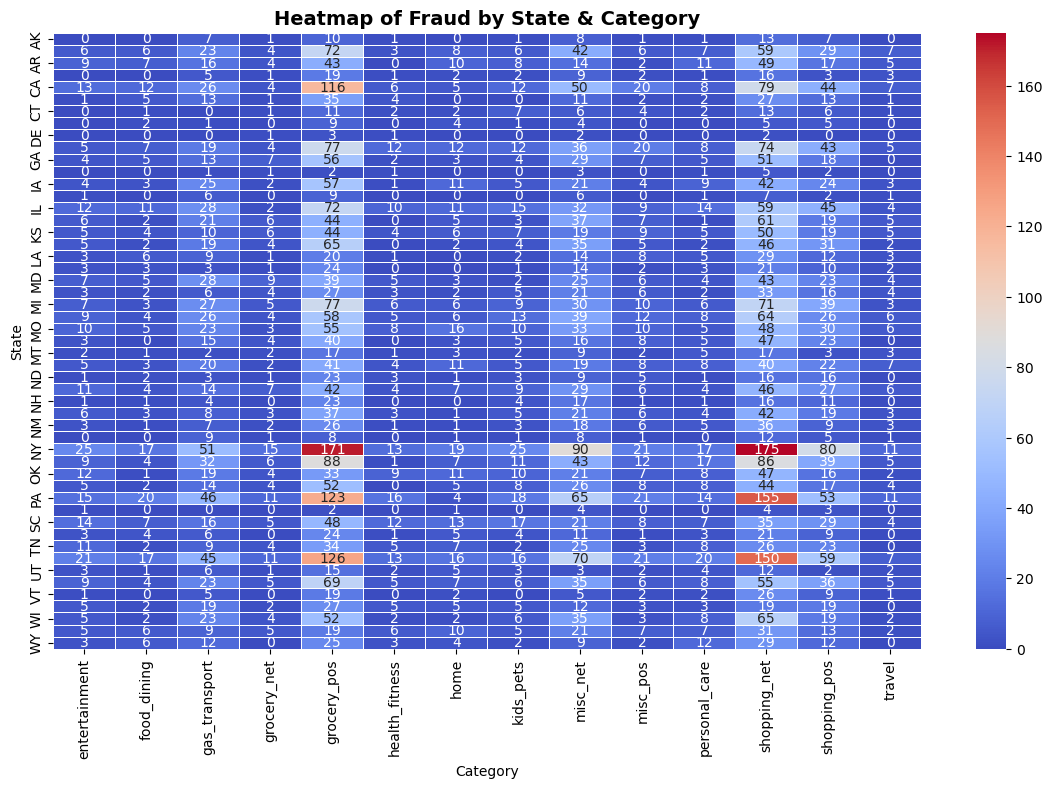

In [69]:
#creating a pivot table for heatmap
fraud_heatmap = fraud_df[fraud_df['is_fraud'] == 1].pivot_table(index='state', columns='category', values='is_fraud', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(fraud_heatmap, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Heatmap of Fraud by State & Category", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("State")
plt.show()


In [76]:
#applying SMOTE technique 
#identifying categorical and numerical features
categorical_cols = fraud_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = fraud_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#exclude target variable ('is_fraud') from numerical columns
numerical_cols.remove('is_fraud')

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['merchant', 'customer_name']
Numerical Columns: ['cc_num', 'amt', 'hour', 'day_of_week', 'month', 'year', 'amt_log']


In [87]:
#scaling numerical features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
fraud_df[numerical_cols] = scaler.fit_transform(fraud_df[numerical_cols])


In [88]:
#split data for SMOTE
from sklearn.model_selection import train_test_split

X = fraud_df.drop(columns=['is_fraud'])  # Features
y = fraud_df['is_fraud']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [89]:
#making sure all data types are numerical
print("X_train dtypes:\n", X_train.dtypes)


X_train dtypes:
 trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                       category
amt                             float64
gender                         category
street                         category
city                           category
state                          category
hour                            float64
day_of_week                     float64
month                           float64
year                            float64
customer_name                    object
amt_log                         float64
dtype: object


In [90]:
#Convert Categorical Variables to Numeric
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Ensure consistency
    label_encoders[col] = le  # Save for future use

print("Converted categorical features:", categorical_cols)


Converted categorical features: ['merchant', 'category', 'gender', 'street', 'city', 'state', 'customer_name']


In [91]:
#cross-checking all data types are numerical
X_train = X_train.select_dtypes(include=['int64', 'float64'])
print("Updated X_train dtypes:\n", X_train.dtypes)


Updated X_train dtypes:
 cc_num           float64
merchant           int64
category           int64
amt              float64
gender             int64
street             int64
city               int64
state              int64
hour             float64
day_of_week      float64
month            float64
year             float64
customer_name      int64
amt_log          float64
dtype: object


In [92]:
from imblearn.over_sampling import SMOTE
import collections

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check distribution before and after SMOTE
print("Before SMOTE:", collections.Counter(y_train))
print("After SMOTE:", collections.Counter(y_train_resampled))


Before SMOTE: Counter({0: 1474194, 1: 7721})
After SMOTE: Counter({0: 1474194, 1: 737097})


In [ ]:
##Notes:
# SMOTE added synthetic fraud transactions (class 1) based on sampling_strategy=0.5.
# Now, the fraud cases are 50% of the non-fraud cases.
# Class imbalance is reduced, so the model will learn fraud patterns better.

In [93]:
# Convert X_train_resampled and y_train_resampled back into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['is_fraud'])

# Combine features and target variable into one DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Display the resampled dataset
resampled_df.tail()

,cc_num,merchant,category,amt,gender,street,city,state,hour,day_of_week,month,year,customer_name,amt_log,is_fraud
2211286,-0.780418,414,4,3.224864,1,64,596,33,-0.995757,0.248727,0.500424,-0.002546,215,0.855976,1
2211287,-0.704451,557,10,11.817691,1,445,254,45,0.748808,0.749067,0.666667,0.000000,198,1.421158,1
2211288,-0.706167,436,6,2.060000,1,952,811,18,-0.381182,-0.750000,-0.833333,0.000000,190,0.196135,1
2211289,-0.093611,346,10,13.629044,0,635,747,13,0.563593,0.595390,0.833333,-1.000000,640,1.487138,1
2211290,0.012949,530,4,-0.446524,1,45,87,48,-0.416682,-0.337498,0.000000,0.000000,952,-0.581105,1


In [94]:
print(resampled_df.dtypes)

cc_num           float64
merchant           int64
category           int64
amt              float64
gender             int64
street             int64
city               int64
state              int64
hour             float64
day_of_week      float64
month            float64
year             float64
customer_name      int64
amt_log          float64
is_fraud           int64
dtype: object


In [49]:
# #feature importance using RandomForest 
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_resampled, y_train_resampled)

# importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
# importance.sort_values(by='Importance', ascending=False, inplace=True)

# print(importance)


          Feature  Importance
3             amt    0.579957
8            hour    0.091677
11           year    0.067925
2        category    0.062173
9     day_of_week    0.061019
0          cc_num    0.028459
10          month    0.026009
5          street    0.016624
6            city    0.016463
12  customer_name    0.016410
1        merchant    0.014714
7           state    0.013138
4          gender    0.005433


In [98]:
#spliting Your Resampled Data into training & testing sets again
from sklearn.model_selection import train_test_split

# Define features and target variable
X_resampled = resampled_df.drop(columns=['is_fraud'])
y_resampled = resampled_df['is_fraud']

# Split into train and test sets (80-20)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Confirm shape
print(f"Training set: {X_train_final.shape}, Test set: {X_test_final.shape}")


Training set: (1769032, 14), Test set: (442259, 14)


In [99]:
#training multiple models to compare performace
#Test Model 1: Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_final, y_train_final)

y_pred_rf = rf.predict(X_test_final)
print("Random Forest Performance:\n", classification_report(y_test_final, y_pred_rf))


Random Forest Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294839
           1       1.00      1.00      1.00    147420

    accuracy                           1.00    442259
   macro avg       1.00      1.00      1.00    442259
weighted avg       1.00      1.00      1.00    442259



In [104]:
#Test Model 2: XGBoost
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train_final[y_train_final == 0]) / len(y_train_final[y_train_final == 1]))
xgb.fit(X_train_final, y_train_final)

y_pred_xgb = xgb.predict(X_test_final)
print("XGBoost Performance:\n", classification_report(y_test_final, y_pred_xgb))


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/f5/b6/653a70910739f127adffbefb688ebc22b51139292757de7c22b1e04ce792/xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00a 0:00:01
XGBoost Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294839
           1       1.00      1.00      1.00    147420

    accuracy                           1.00    442259
   macro avg       1.00      1.00      1.00    442259
weighted avg       1.00      1.00      1.00    442259



In [100]:
#Test Model 3: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=500)
lr.fit(X_train_final, y_train_final)

y_pred_lr = lr.predict(X_test_final)
print("Logistic Regression Performance:\n", classification_report(y_test_final, y_pred_lr))


/Users/nidanoorali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94    294839
           1       0.90      0.84      0.87    147420

    accuracy                           0.92    442259
   macro avg       0.91      0.90      0.90    442259
weighted avg       0.91      0.92      0.91    442259



In [101]:
#Test Model4: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
dt.fit(X_train_final, y_train_final)

y_pred_dt = dt.predict(X_test_final)
print("Decision Tree Performance:\n", classification_report(y_test_final, y_pred_dt))


Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    294839
           1       0.97      0.96      0.97    147420

    accuracy                           0.98    442259
   macro avg       0.97      0.97      0.97    442259
weighted avg       0.98      0.98      0.98    442259



In [102]:
#Test Model5: Naïve Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_final, y_train_final)

y_pred_nb = nb.predict(X_test_final)
print("Naïve Bayes Performance:\n", classification_report(y_test_final, y_pred_nb))


Naïve Bayes Performance:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93    294839
           1       0.93      0.74      0.82    147420

    accuracy                           0.90    442259
   macro avg       0.91      0.86      0.87    442259
weighted avg       0.90      0.90      0.89    442259



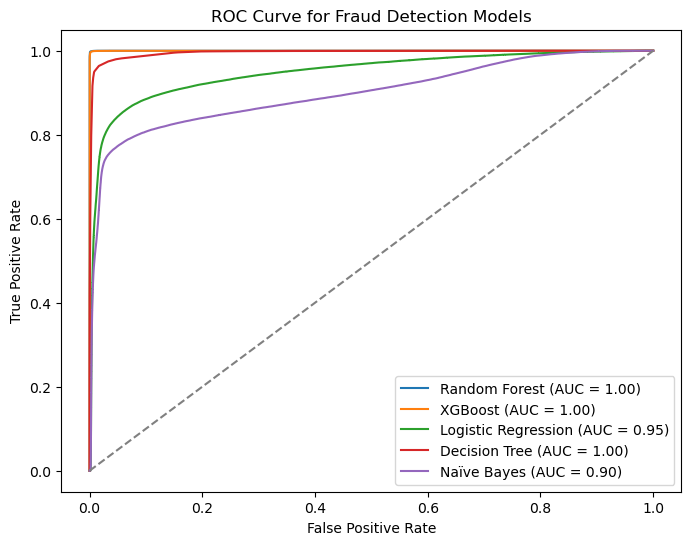

In [105]:
#Receivers operating characteristic 
#A higher AUC score (Area Under the Curve) means the model is better at predicting fraud/non-fraud.

from sklearn.metrics import roc_curve, auc

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Naïve Bayes": nb
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_probs = model.predict_proba(X_test_final)[:,1]  # Get probabilities
    fpr, tpr, _ = roc_curve(y_test_final, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fraud Detection Models")
plt.legend()
plt.show()


                 Model  Best Threshold  F1 Score  Accuracy    Recall  \
0  Logistic Regression        0.508584  0.868624  0.915785  0.835212   
1          Naive-Bayes        0.389278  0.827789  0.895003  0.757055   
2        Random Forest        0.625000  0.997676  0.998451  0.997314   
3              XGBoost        0.517603  0.996420  0.997612  0.996873   
4        Decision Tree        0.666667  0.966206  0.977818  0.951289   

   Precision  
0   0.904820  
1   0.913104  
2   0.998038  
3   0.995968  
4   0.981598  


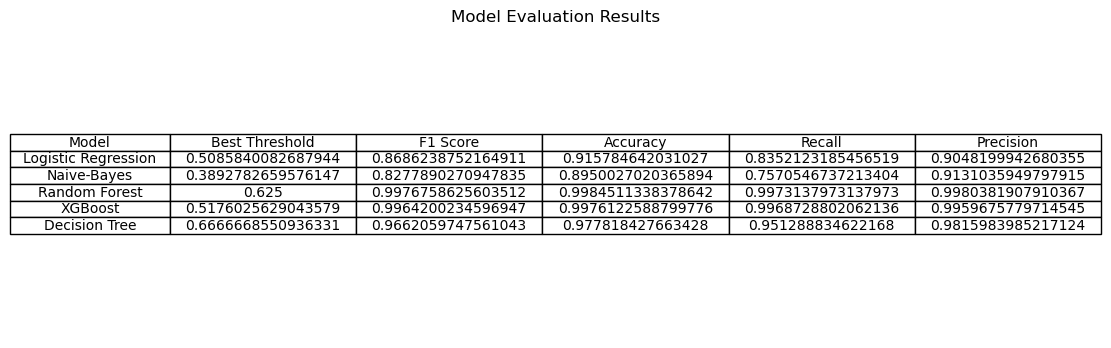

In [106]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, precision_recall_curve

#defining models and their names
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest", "XGBoost", "Decision Tree"]
models = [lr, nb, rf, xgb, dt]  # Replace with your trained models

# Initialize an empty list for results
evaluation_results = []

# Find the best threshold and store metrics for each model
for name, model in zip(model_names, models):
    y_probs = model.predict_proba(X_test_final)[:, 1]  # Get probability scores
    precision, recall, thresholds = precision_recall_curve(y_test_final, y_probs)

    # Find the best threshold (maximizing F1-score)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]

    # Apply the best threshold
    y_pred = (y_probs > best_threshold).astype(int)

    # Compute performance metrics
    f1 = f1_score(y_test_final, y_pred)
    accuracy = accuracy_score(y_test_final, y_pred)
    recall_val = recall_score(y_test_final, y_pred)
    precision_val = precision_score(y_test_final, y_pred)

    # Append results
    evaluation_results.append([name, best_threshold, f1, accuracy, recall_val, precision_val])

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(evaluation_results, columns=["Model", "Best Threshold", "F1 Score", "Accuracy", "Recall", "Precision"])

# Display the table
print(results_df)

# Plot the table as an image
plt.figure(figsize=(8, 4))
plt.axis('off')
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4, 5])
plt.title("Model Evaluation Results")
plt.show()


In [108]:
#checking for Overfitting
##Your XGBoost, Random Forest, and Decision Tree models all have AUC = 1.00. This might mean:
#They have memorized the training data.
#They could fail on new, unseen fraud cases

from sklearn.metrics import roc_auc_score

# Define models as a dictionary instead of a list
models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Decision Tree": dt
}  # Ensure these are your trained models

# Check AUC on training and test sets
for name, model in models.items():
    train_probs = model.predict_proba(X_train_final)[:, 1]  # Get probability scores for training data
    train_auc = roc_auc_score(y_train_final, train_probs)

    test_probs = model.predict_proba(X_test_final)[:, 1]  # Get probability scores for testing data
    test_auc = roc_auc_score(y_test_final, test_probs)

    print(f"{name}: Train AUC = {train_auc:.2f}, Test AUC = {test_auc:.2f}")


Random Forest: Train AUC = 1.00, Test AUC = 1.00
XGBoost: Train AUC = 1.00, Test AUC = 1.00
Decision Tree: Train AUC = 1.00, Test AUC = 1.00


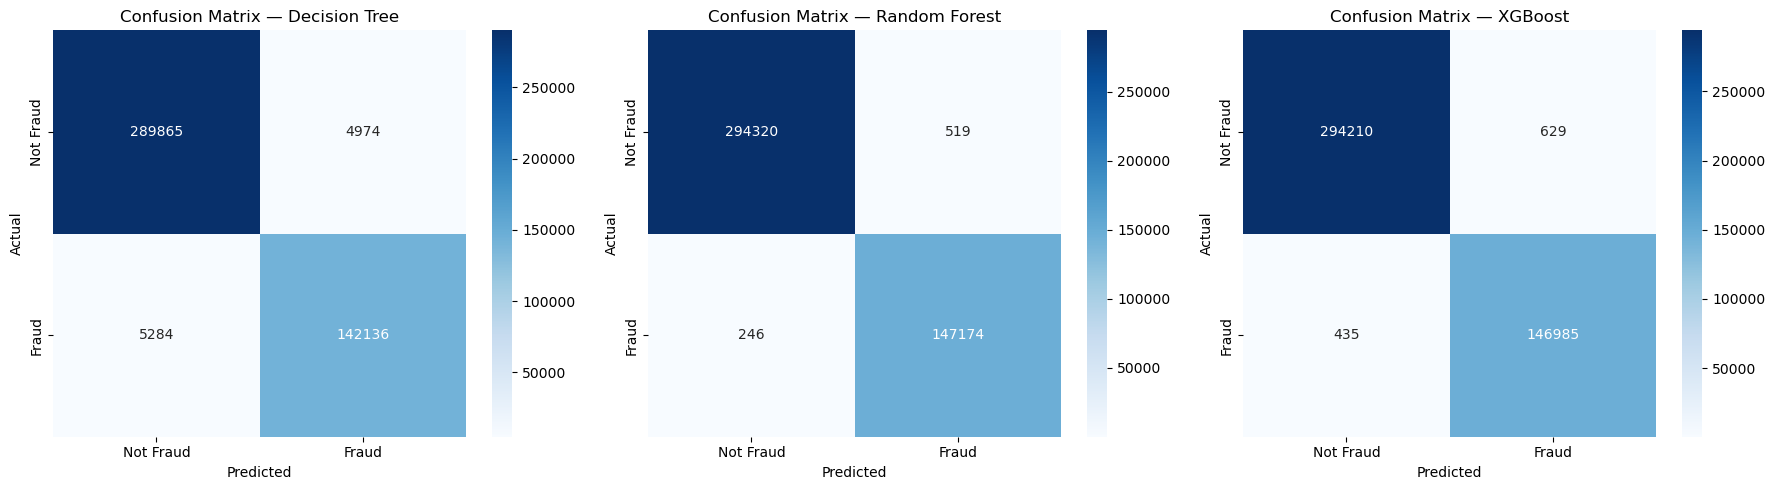

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the three best models (Ensure these are trained)
best_models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Create subplots for three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, best_models.items()):
    # Get predictions
    y_pred = model.predict(X_test_final)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_final, y_pred)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=True, xticklabels=["Not Fraud", "Fraud"], 
                yticklabels=["Not Fraud", "Fraud"], ax=ax)
    
    # Set titles and labels
    ax.set_title(f"Confusion Matrix — {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define hyperparameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1]  # L2 regularization
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
xgb_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, 
    n_iter=20, scoring='recall', cv=3, n_jobs=-1, verbose=2, random_state=42
)

# Train the model
xgb_search.fit(X_train_final, y_train_final)

# Get the best parameters
best_xgb_params = xgb_search.best_params_
best_xgb_model = xgb_search.best_estimator_

# Display the best hyperparameters found
print("Best Hyperparameters for XGBoost:", best_xgb_params)


NameError: name 'X_train_final' is not defined

In [113]:
from sklearn.metrics import classification_report

y_pred_xgb = best_xgb_model.predict(X_test_final)
print(classification_report(y_test_final, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294839
           1       1.00      1.00      1.00    147420

    accuracy                           1.00    442259
   macro avg       1.00      1.00      1.00    442259
weighted avg       1.00      1.00      1.00    442259



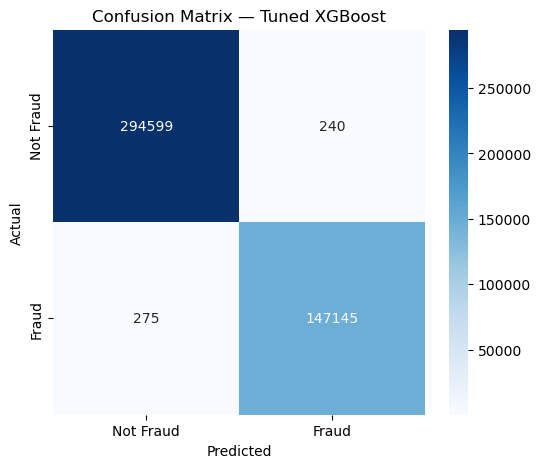

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=  11.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.01, subsample=1.0; total time=  27.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9; total time=  33.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0.01, reg_lambda=0, subsample=0.9; total time=  34.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=0, subsample=1.0; total time=  27.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.9; total time=  55.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9; to

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the tuned XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test_final)

# Compute new confusion matrix
cm_xgb_tuned = confusion_matrix(y_test_final, y_pred_xgb_tuned)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Fraud", "Fraud"], 
            yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix — Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
